In [125]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

file_path = '/content/drive/MyDrive/UNFCCC_v27.csv'
df = pd.read_csv(file_path)

<ipython-input-126-fcf212c36a01>:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


#Exploratory data analysis

In [127]:
df.head()

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2007,13.74113,NaN,20240415,EEA
1,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2022,12.96826,NaN,20240415,EEA
2,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1990,52665.86314,NaN,20240415,EEA
3,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,2004,66228.81593,NaN,20240415,EEA
4,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,2006,63921.10524,NaN,20240415,EEA


In [128]:
df.shape

(669753, 13)

In [129]:
df.dtypes

,0
Country_code,object
Country,object
Format_name,object
Pollutant_name,object
Sector_code,object
Sector_name,object
Parent_sector_code,object
Unit,object
Year,object
emissions,float64


In [130]:
df = df[df["Sector_code"].isin(["1.A.3.b"])]
df.head()

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
193,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2007,23084.87845,NaN,20240415,EEA
194,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2014,21466.60889,NaN,20240415,EEA
195,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2021,21392.37407,NaN,20240415,EEA
266,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,1992,14909.99910,NaN,20240415,EEA
267,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2000,18180.30959,NaN,20240415,EEA


# Check sector name

In [131]:

df_rows = df["Sector_name"].drop_duplicates()
df_rows

,Sector_name
193,1.A.3.b - Road Transportation


In [132]:
df_null = df["Notation"].dropna()
df_null = df[df["Notation"] != "—"]
df_null

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
193,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2007,23084.87845,NaN,20240415,EEA
194,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2014,21466.60889,NaN,20240415,EEA
195,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2021,21392.37407,NaN,20240415,EEA
266,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,1992,14909.99910,NaN,20240415,EEA
267,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2000,18180.30959,NaN,20240415,EEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668269,SK,Slovakia,IPCC Common Reporting Format,CO2,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2009,5968.57272,NaN,20240415,EEA
668854,SK,Slovakia,IPCC Common Reporting Format,N2O,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2001,0.16781,NaN,20240415,EEA
668855,SK,Slovakia,IPCC Common Reporting Format,N2O,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2003,0.16752,NaN,20240415,EEA
668856,SK,Slovakia,IPCC Common Reporting Format,N2O,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2004,0.16928,NaN,20240415,EEA


#Eliminating unecessary information

In [133]:
df = df.drop(["Country_code","Format_name","DataSource","PublicationDate","Notation"], axis=1)
df.head()

,Country,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions
193,Austria,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2007,23084.87845
194,Austria,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2014,21466.60889
195,Austria,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2021,21392.37407
266,Austria,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,1992,14909.99910
267,Austria,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2000,18180.30959


In [134]:
df.isnull().sum() / df.shape[0]

,0
Country,0.0
Pollutant_name,0.0
Sector_code,0.0
Sector_name,0.0
Parent_sector_code,0.0
Unit,0.0
Year,0.0
emissions,0.0


In [135]:
df = df.dropna(subset=["emissions"])
df.shape

(4152, 8)

In [136]:
df.describe(include='all')

,Country,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions
count,4152,4152,4152,4152,4152,4152,4152.0,4152.000000
unique,31,4,1,1,1,2,76.0,NaN
top,Hungary,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2018.0,NaN
freq,156,1038,4152,4152,4152,3114,84.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23827.853801
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95325.670595
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007840
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682972
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.471860
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11415.711767


# EU27 Histogram plot

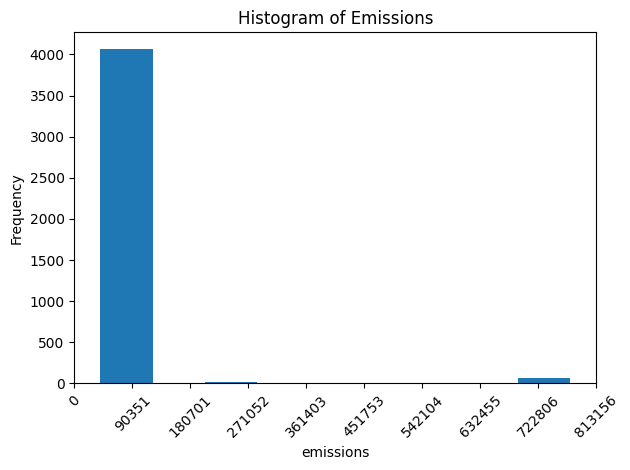

In [137]:
import numpy as np

df["emissions"].plot(kind="hist", bins=5, rwidth=0.5)

plt.xlabel("emissions")

min_val = df["emissions"].min()
max_val = df["emissions"].max()

# 6 tick values from min to max
x_ticks = np.linspace(min_val, max_val, 10)

plt.xticks(x_ticks, rotation=45)

plt.title("Histogram of Emissions")
plt.tight_layout()
plt.show()


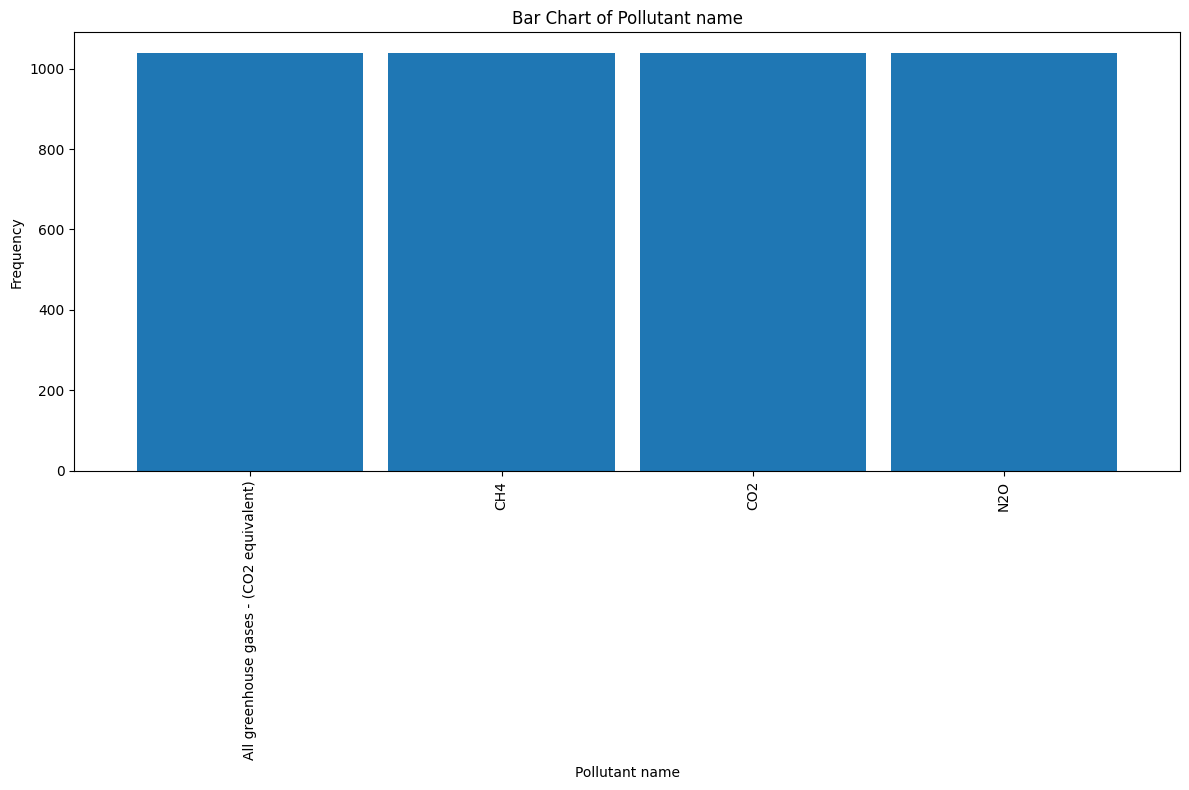

In [138]:
counts = df["Pollutant_name"].value_counts().sort_index()
plt.figure(figsize=(12, 8))

counts.plot(kind="bar", width=0.9)

plt.xlabel("Pollutant name")
plt.ylabel("Frequency")
plt.title("Bar Chart of Pollutant name")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#Emissions by Country Bar Chart

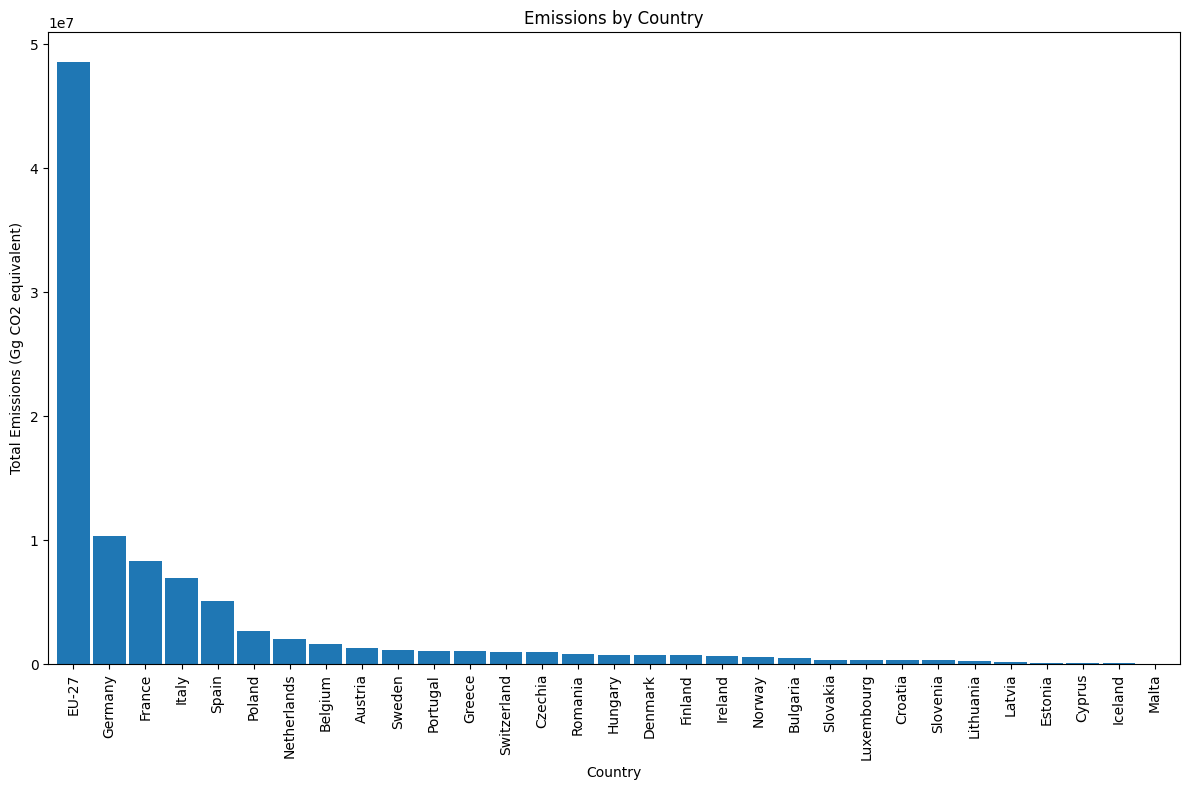

In [139]:
country_emissions = df.groupby("Country")["emissions"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
country_emissions.plot(kind="bar", width=0.9)

plt.xlabel("Country")
plt.ylabel("Total Emissions (Gg CO2 equivalent)")
plt.title("Emissions by Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Line Chart for EU-27 Total Emissions by Year

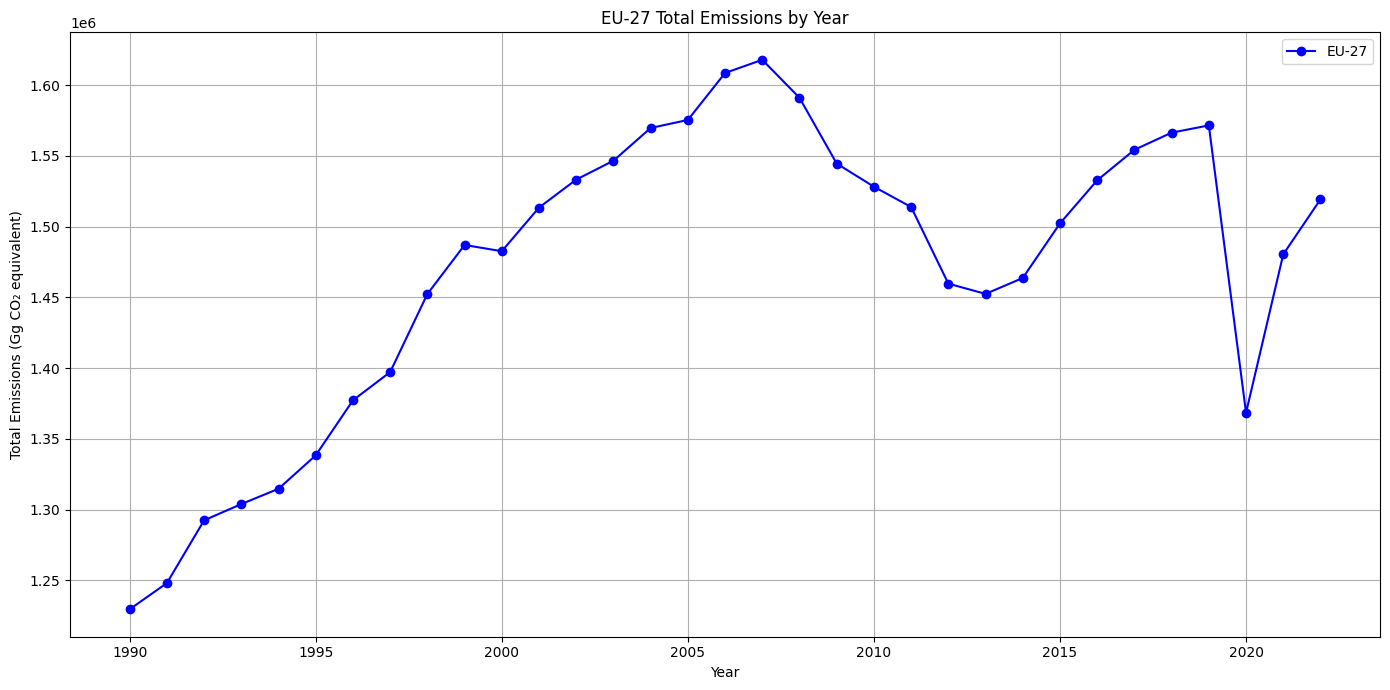

In [140]:
# Filter EU-27 data
eu27_df = df[df["Country"] == "EU-27"].copy()

eu27_df["Year"] = eu27_df["Year"].astype(int)

# Group by Year and sum emissions
eu27_yearly = eu27_df.groupby("Year", as_index=False)["emissions"].sum()

eu27_yearly = eu27_yearly.sort_values("Year")

plt.figure(figsize=(14, 7))
plt.plot(eu27_yearly["Year"], eu27_yearly["emissions"], marker="o", color="blue", label="EU-27")
plt.xlabel("Year")
plt.ylabel("Total Emissions (Gg CO₂ equivalent)")
plt.title("EU-27 Total Emissions by Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [141]:
eu27_df = df[df["Country"] == "EU-27"]
display(eu27_df[eu27_df["Year"] == 2022])


,Country,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions
242135,EU-27,CO2,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2022,755505.32641
259631,EU-27,All greenhouse gases - (CO2 equivalent),1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg CO2 equivalent,2022,763725.75329
261932,EU-27,CH4,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2022,40.77570


In [142]:
file_path_usa = '/content/drive/MyDrive/data.csv'
dfUSA = pd.read_csv(file_path_usa)

In [143]:
dfUSA.head()

,"U.S. Emissions, Transportation Sector, MMT CO2 eq.",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fossil fuel combustion: carbon dioxide,1468.943894,1422.327405,1477.643426,1508.607034,1553.947354,1580.677858,1627.363105,1643.515554,1678.920338,...,1669.045920,1707.346730,1718.381161,1757.906545,1780.307824,1813.134649,1816.635674,1572.820206,1753.545925,1751.286417
1,Use of fluorinated gases,0.000000,0.000000,1.062711,4.635802,11.284620,17.843188,25.813933,34.050635,39.818156,...,47.264229,44.733239,42.577810,39.859606,37.031401,35.549481,34.030569,32.519852,31.244202,29.573235
2,Fossil fuel combustion: other greenhouse gases,40.637553,41.853144,44.260144,45.982753,47.821670,49.300108,50.449759,51.349559,51.809513,...,20.811893,18.865124,17.502716,16.344243,15.034265,13.709349,15.054662,12.166552,12.674679,12.227143
3,Transportation non-energy use,11.838675,10.590906,10.797881,10.995035,11.491990,11.294702,10.961335,11.579435,12.121996,...,9.643206,10.046798,10.951515,10.382451,9.550515,9.214391,8.833871,7.776866,8.007115,8.434114
4,Gross total,1521.420123,1474.771455,1533.764162,1570.220624,1624.545635,1659.115856,1714.588132,1740.495184,1782.670003,...,1746.765248,1780.991891,1789.413201,1824.492845,1841.924005,1871.607869,1874.554777,1625.283476,1805.471921,1801.520909


In [144]:
dfUSA.shape

(5, 34)

In [145]:
dfUSA.dtypes

,0
"U.S. Emissions, Transportation Sector, MMT CO2 eq.",object
1990,float64
1991,float64
1992,float64
1993,float64
1994,float64
1995,float64
1996,float64
1997,float64
1998,float64


In [146]:
dfUSA.isnull().sum() / dfUSA.shape[0]

,0
"U.S. Emissions, Transportation Sector, MMT CO2 eq.",0.0
1990,0.0
1991,0.0
1992,0.0
1993,0.0
1994,0.0
1995,0.0
1996,0.0
1997,0.0
1998,0.0


In [147]:
dfUSA.describe(include='all')

,"U.S. Emissions, Transportation Sector, MMT CO2 eq.",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Fossil fuel combustion: carbon dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,608.568049,589.908582,613.505665,628.088250,649.818254,663.646343,685.835253,696.198074,713.068001,...,698.706099,712.396756,715.765281,729.797138,736.769602,748.643148,749.821911,650.113390,722.188768,720.608364
std,NaN,809.711610,784.198519,814.860921,832.356675,858.068821,873.491847,899.945117,909.799206,929.888787,...,921.779811,942.321226,948.086611,969.272145,981.035336,998.696285,1000.552229,866.507173,965.410540,964.001406
min,NaN,0.000000,0.000000,1.062711,4.635802,11.284620,11.294702,10.961335,11.579435,12.121996,...,9.643206,10.046798,10.951515,10.382451,9.550515,9.214391,8.833871,7.776866,8.007115,8.434114
25%,NaN,11.838675,10.590906,10.797881,10.995035,11.491990,17.843188,25.813933,34.050635,39.818156,...,20.811893,18.865124,17.502716,16.344243,15.034265,13.709349,15.054662,12.166552,12.674679,12.227143
50%,NaN,40.637553,41.853144,44.260144,45.982753,47.821670,49.300108,50.449759,51.349559,51.809513,...,47.264229,44.733239,42.577810,39.859606,37.031401,35.549481,34.030569,32.519852,31.244202,29.573235
75%,NaN,1468.943894,1422.327405,1477.643426,1508.607034,1553.947354,1580.677858,1627.363105,1643.515554,1678.920338,...,1669.045920,1707.346730,1718.381161,1757.906545,1780.307824,1813.134649,1816.635674,1572.820206,1753.545925,1751.286417


#Histogram of Gross Total Emissions by Year

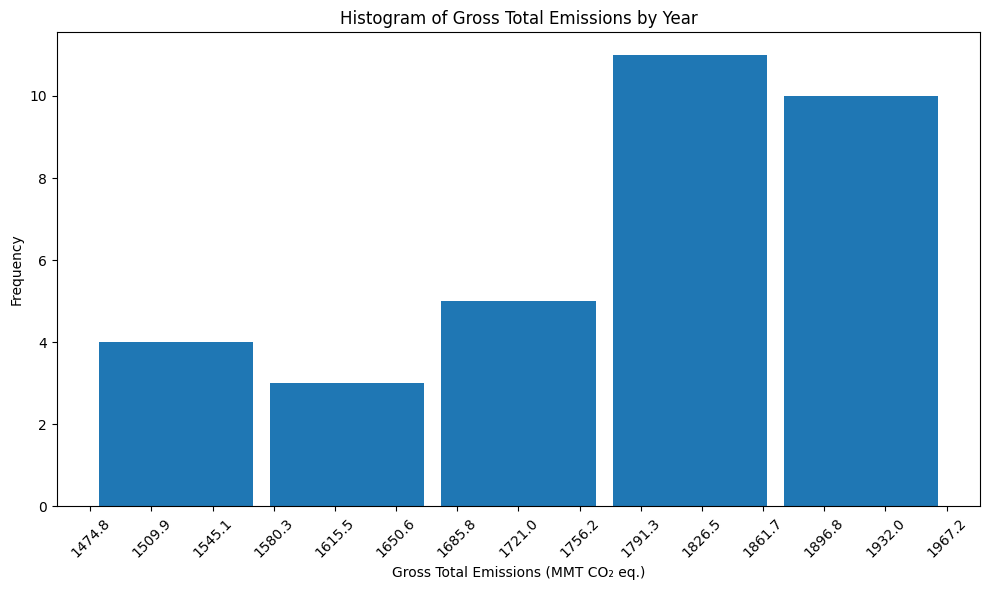

In [148]:
gross_total = dfUSA.iloc[4, 1:].astype(float)


plt.figure(figsize=(10, 6))
plt.hist(gross_total, bins=5, rwidth=0.9)

plt.xlabel("Gross Total Emissions (MMT CO₂ eq.)")
plt.ylabel("Frequency")
plt.title("Histogram of Gross Total Emissions by Year")


min_val = gross_total.min()
max_val = gross_total.max()
x_ticks = np.linspace(min_val, max_val, 15)
plt.xticks(x_ticks, rotation=45)

plt.tight_layout()
plt.show()


#EU-27 vs USA Total Transportation Emissions (1990–2022)

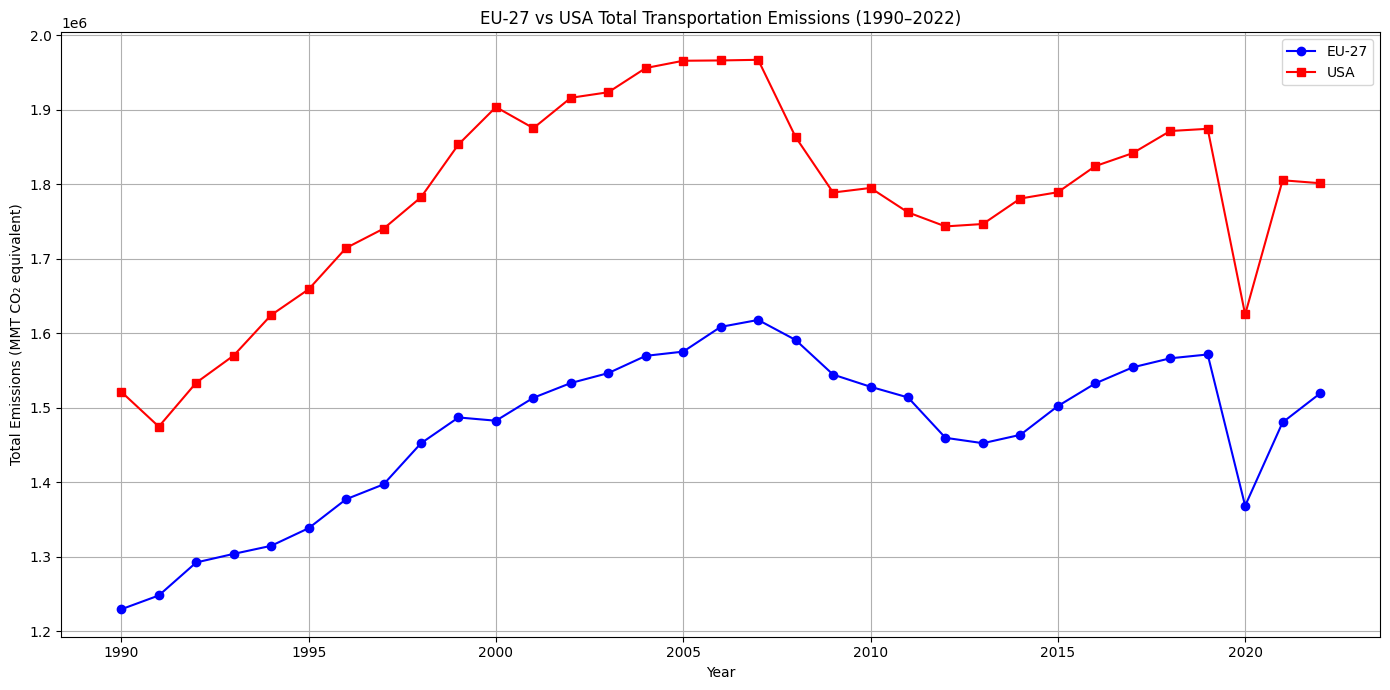

In [149]:

us_years = [int(col) for col in dfUSA.columns[1:]]
us_emissions = dfUSA.iloc[4, 1:].astype(float).values * 1000


us_df = pd.DataFrame({
    "Year": us_years,
    "emissions": us_emissions
})


us_df = us_df[(us_df["Year"] >= 1990) & (us_df["Year"] <= 2022)]


eu27_df = df[df["Country"] == "EU-27"].copy()
eu27_df["Year"] = eu27_df["Year"].astype(int)
eu27_yearly = eu27_df.groupby("Year", as_index=False)["emissions"].sum()
eu27_yearly = eu27_yearly.sort_values("Year")
eu27_yearly = eu27_yearly[(eu27_yearly["Year"] >= 1990) & (eu27_yearly["Year"] <= 2022)]


plt.figure(figsize=(14, 7))


plt.plot(eu27_yearly["Year"], eu27_yearly["emissions"], marker="o", color="blue", label="EU-27")


plt.plot(us_df["Year"], us_df["emissions"], marker="s", color="red", label="USA")

plt.xlabel("Year")
plt.ylabel("Total Emissions (MMT CO₂ equivalent)")
plt.title("EU-27 vs USA Total Transportation Emissions (1990–2022)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#U.S. Transportation Emissions by Source (2022)

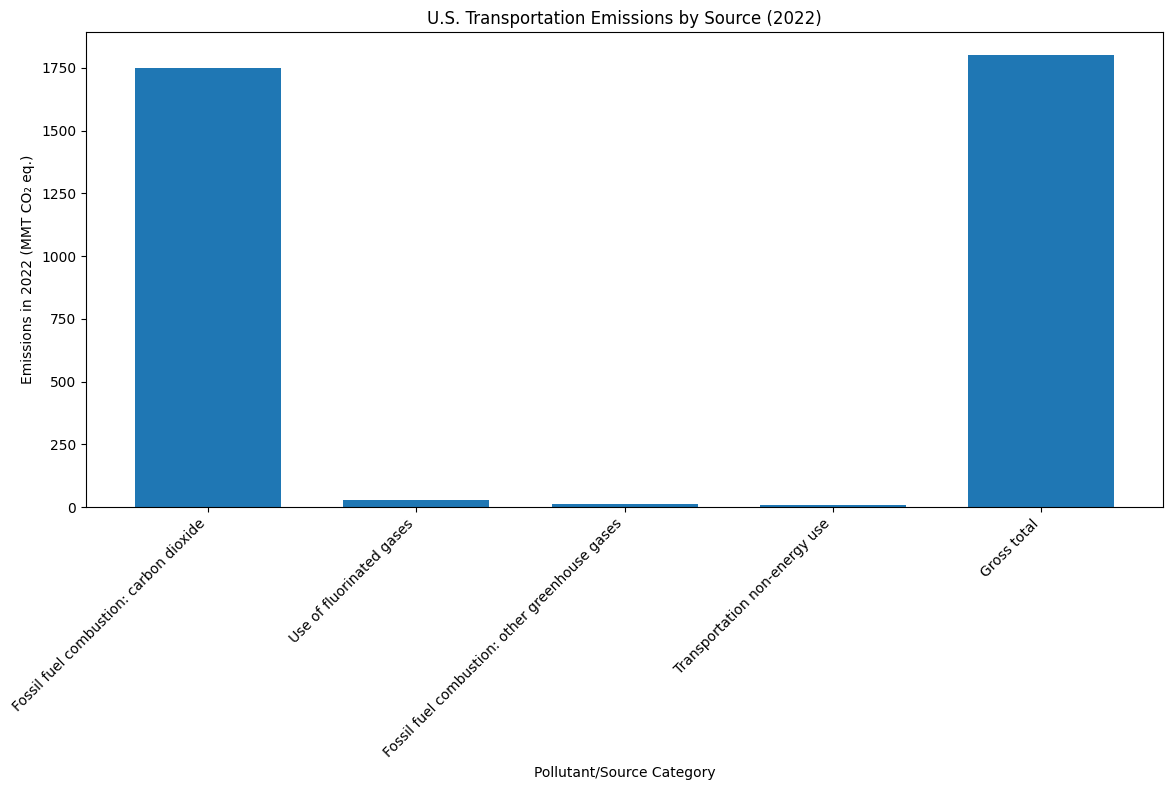

In [150]:
pollutant_names = dfUSA.iloc[:, 0]


emissions_2022 = dfUSA["2022"].astype(float)


plt.figure(figsize=(12, 8))
plt.bar(pollutant_names, emissions_2022, width=0.7)

plt.xlabel("Pollutant/Source Category")
plt.ylabel("Emissions in 2022 (MMT CO₂ eq.)")
plt.title("U.S. Transportation Emissions by Source (2022)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#USA and Europe sources are used together to comparison

In [151]:
eu27_df = df[df["Country"] == "EU-27"].copy()
eu27_df["Year"] = eu27_df["Year"].astype(int)
eu27_yearly = eu27_df.groupby("Year", as_index=False)["emissions"].sum()
eu27_yearly = eu27_yearly.sort_values("Year")
eu27_yearly = eu27_yearly[(eu27_yearly["Year"] >= 1990) & (eu27_yearly["Year"] <= 2022)]
eu27_yearly.rename(columns={"emissions": "EU27_emissions"}, inplace=True)


year_columns = dfUSA.columns[1:]
years = [int(col.strip()) for col in year_columns]
us_values = dfUSA.iloc[4, 1:].values.astype(float)

us_df = pd.DataFrame({
    "Year": years,
    "USA_emissions": us_values
})


us_df = us_df[(us_df["Year"] >= 1990) & (us_df["Year"] <= 2022)]


df_total = pd.merge(eu27_yearly, us_df, on="Year", how="inner")


In [152]:
df_total["USA_emissions"] = df_total["USA_emissions"] * 1000
df_total.head()

,Year,EU27_emissions,USA_emissions
0,1990,1.229585e+06,1.521420e+06
1,1991,1.248089e+06,1.474771e+06
2,1992,1.292439e+06,1.533764e+06
3,1993,1.303930e+06,1.570221e+06
4,1994,1.314749e+06,1.624546e+06


transportation data sources for usa: https://www.ceicdata.com/en/indicator/united-states/number-of-registered-vehicles?utm

transportation data sources for eu27 : https://www.acea.auto/figure/passenger-car-registrations-in-europe-since-1990-by-country/?utm


In [153]:
data = {
    "Year": [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2022],
    "USA": [193.1, 208.0, 221.0, 237.2, 248.0, 263.0, 276.5, 283.4],
    "EU27": [170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 240.0, 256.0]
}
df = pd.DataFrame(data)


years_full = np.arange(1990, 2023).reshape(-1, 1)

# Linear regression for USA
reg_usa = LinearRegression()
reg_usa.fit(np.array(df["Year"]).reshape(-1, 1), df["USA"])
usa_pred = reg_usa.predict(years_full)

# Linear regression for EU27
reg_eu = LinearRegression()
reg_eu.fit(np.array(df["Year"]).reshape(-1, 1), df["EU27"])
eu_pred = reg_eu.predict(years_full)


df_full = pd.DataFrame({
    "Year": years_full.flatten(),
    "USA (estimated)": usa_pred,
    "EU27 (estimated)": eu_pred
})



df_full["USA_Individual"] = df_full["USA (estimated)"] * 0.88
df_full["USA_Public"] = df_full["USA (estimated)"] * 0.12

df_full["EU27_Individual"] = df_full["EU27 (estimated)"] * 0.85
df_full["EU27_Public"] = df_full["EU27 (estimated)"] * 0.15



In [154]:
df_total["USA_Individual"] = df_full["USA_Individual"]
df_total["USA_Public"] = df_full["USA_Public"]
df_total["EU27_Individual"] = df_full["EU27_Individual"]
df_total["EU27_Public"] = df_full["EU27_Public"]

df_total

,Year,EU27_emissions,USA_emissions,USA_Individual,USA_Public,EU27_Individual,EU27_Public
0,1990,1.229585e+06,1.521420e+06,170.377859,23.233344,140.934081,24.870720
1,1991,1.248089e+06,1.474771e+06,172.827152,23.567339,143.040850,25.242503
2,1992,1.292439e+06,1.533764e+06,175.276444,23.901333,145.147619,25.614286
3,1993,1.303930e+06,1.570221e+06,177.725737,24.235328,147.254388,25.986068
4,1994,1.314749e+06,1.624546e+06,180.175030,24.569322,149.361157,26.357851
5,1995,1.338404e+06,1.659116e+06,182.624323,24.903317,151.467926,26.729634
6,1996,1.377293e+06,1.714588e+06,185.073616,25.237311,153.574695,27.101417
7,1997,1.397237e+06,1.740495e+06,187.522909,25.571306,155.681464,27.473200
8,1998,1.452422e+06,1.782670e+06,189.972202,25.905300,157.788233,27.844982
9,1999,1.487065e+06,1.853617e+06,192.421495,26.239295,159.895002,28.216765


#Europe's Transportation-CO2 Emission Scatter Plot

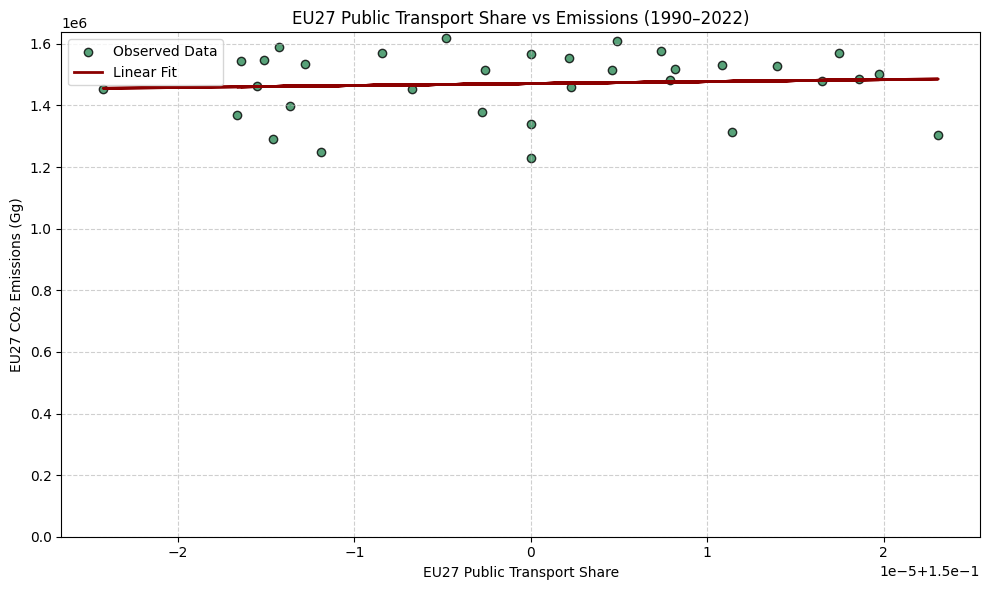

In [155]:
data = {
    "Year": list(range(1990, 2023)),
    "EU27_emissions": [
        1229585, 1248089, 1292439, 1303930, 1314749, 1338404, 1377293, 1397237, 1452422, 1487065,
        1482672, 1513504, 1533287, 1546628, 1569771, 1575444, 1608656, 1617965, 1591076, 1544621,
        1528245, 1513914, 1459737, 1452500, 1463732, 1502329, 1532773, 1554355, 1566463, 1571602,
        1368456, 1480455, 1519299
    ],
    "EU27_Individual": [
        140.93, 143.04, 145.14, 147.25, 149.36, 151.47, 153.57, 155.68, 157.79, 159.89,
        162.00, 164.11, 166.22, 168.32, 170.43, 172.54, 174.64, 176.75, 178.86, 180.96,
        183.07, 185.18, 187.28, 189.39, 191.50, 193.60, 195.71, 197.82, 199.92, 202.03,
        204.14, 206.24, 208.35
    ],
    "EU27_Public": [
        24.87, 25.24, 25.61, 25.99, 26.36, 26.73, 27.10, 27.47, 27.84, 28.22,
        28.59, 28.96, 29.33, 29.70, 30.08, 30.45, 30.82, 31.19, 31.56, 31.93,
        32.31, 32.68, 33.05, 33.42, 33.79, 34.17, 34.54, 34.91, 35.28, 35.65,
        36.02, 36.40, 36.77
    ]
}

df_full = pd.DataFrame(data)

df_full["EU27_Public_Ratio"] = df_full["EU27_Public"] / (df_full["EU27_Individual"] + df_full["EU27_Public"])

X = df_full["EU27_Public_Ratio"].values.reshape(-1, 1)
y = df_full["EU27_emissions"].values

# Lineer regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# form graph
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='seagreen', alpha=0.8, edgecolors='black', label='Observed Data')
plt.plot(X, y_pred, color='darkred', linewidth=2, label='Linear Fit')


plt.xlabel("EU27 Public Transport Share")
plt.ylabel("EU27 CO₂ Emissions (Gg)")
plt.ylim(bottom=0)
plt.title("EU27 Public Transport Share vs Emissions (1990–2022)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#USA's Transportation-CO2 Emission Scatter Plot

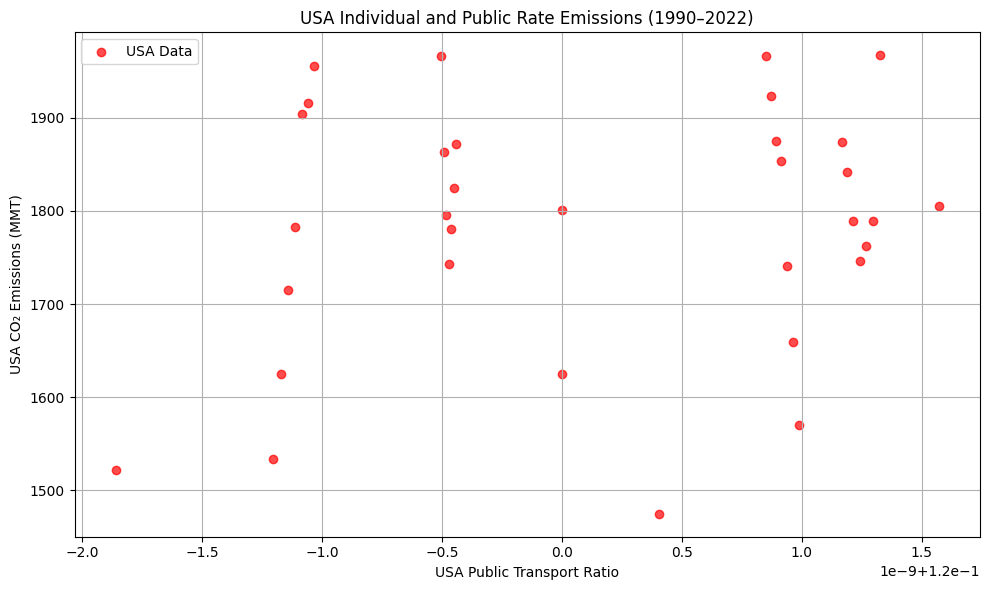

In [156]:
data = {
    "Year": list(range(1990, 2023)),
    "USA_emissions": [
        1521.420123, 1474.771455, 1533.764162, 1570.220624, 1624.545635, 1659.115856, 1714.588132, 1740.495184,
        1782.670003, 1853.617428, 1903.740701, 1875.436386, 1916.204302, 1923.657440, 1956.164107, 1965.915866,
        1966.341905, 1967.189779, 1863.443300, 1789.022602, 1795.148541, 1762.377423, 1743.520088, 1746.765248,
        1780.991891, 1789.413201, 1824.492845, 1841.924005, 1871.607869, 1874.554777, 1625.283476, 1805.471921,
        1801.520909
    ],
    "USA_Individual": [
        170.377859, 172.827152, 175.276444, 177.725737, 180.175030, 182.624323, 185.073616, 187.522909,
        189.972202, 192.421495, 194.870788, 197.320081, 199.769374, 202.218667, 204.667960, 207.117253,
        209.566545, 212.015838, 214.465131, 216.914424, 219.363717, 221.813010, 224.262303, 226.711596,
        229.160889, 231.610182, 234.059475, 236.508768, 238.958061, 241.407354, 243.856646, 246.305939,
        248.755232
    ],
    "USA_Public": [
        23.233344, 23.567339, 23.901333, 24.235328, 24.569322, 24.903317, 25.237311, 25.571306,
        25.905300, 26.239295, 26.573289, 26.907284, 27.241278, 27.575273, 27.909267, 28.243262,
        28.577256, 28.911251, 29.245245, 29.579240, 29.913234, 30.247229, 30.581223, 30.915218,
        31.249212, 31.583207, 31.917201, 32.251196, 32.585190, 32.919185, 33.253179, 33.587174,
        33.921168
    ]
}

df_usa = pd.DataFrame(data)

df_usa["USA_Public_Ratio"] = df_usa["USA_Public"] / (df_usa["USA_Individual"] + df_usa["USA_Public"])

plt.figure(figsize=(10, 6))
plt.scatter(df_usa["USA_Public_Ratio"], df_usa["USA_emissions"], c='red', alpha=0.7, label="USA Data")

plt.xlabel("USA Public Transport Ratio")
plt.ylabel("USA CO₂ Emissions (MMT)")
plt.title("USA Individual and Public Rate Emissions (1990–2022)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Pearson and Spearman's analize from Scotter Plots

In [157]:
from scipy.stats import pearsonr, spearmanr
from IPython.display import display


df_usa["USA_emissions_per_public_vehicle"] = df_usa["USA_emissions"] / df_usa["USA_Public"]
df_full["EU27_emissions_per_public_vehicle"] = df_full["EU27_emissions"] / df_full["EU27_Public"]

usa_pearson_new_r, usa_pearson_new_p = pearsonr(df_usa["USA_Public_Ratio"], df_usa["USA_emissions_per_public_vehicle"])
usa_spearman_new_r, usa_spearman_new_p = spearmanr(df_usa["USA_Public_Ratio"], df_usa["USA_emissions_per_public_vehicle"])

eu_pearson_new_r, eu_pearson_new_p = pearsonr(df_full["EU27_Public_Ratio"], df_full["EU27_emissions_per_public_vehicle"])
eu_spearman_new_r, eu_spearman_new_p = spearmanr(df_full["EU27_Public_Ratio"], df_full["EU27_emissions_per_public_vehicle"])

final_corr = pd.DataFrame({
    "Region": ["USA", "EU27"],
    "Pearson_r (CO2/public vehicle)": [usa_pearson_new_r, eu_pearson_new_r],
    "Pearson_p": [usa_pearson_new_p, eu_pearson_new_p],
    "Spearman_r (CO2/public vehicle)": [usa_spearman_new_r, eu_spearman_new_r],
    "Spearman_p": [usa_spearman_new_p, eu_spearman_new_p]
})

display(final_corr)


,Region,Pearson_r (CO2/public vehicle),Pearson_p,Spearman_r (CO2/public vehicle),Spearman_p
0,USA,-0.245851,0.167856,-0.346453,0.048253
1,EU27,-0.060401,0.738452,-0.034428,0.849149


In [158]:
print("Hypothesis Testing Summary")
print("-" * 40)

print("USA:")
print("Pearson r = -0.25, p = 0.168 → Fail to Reject H₀")
print("Spearman ρ = -0.35, p = 0.048 → Reject H₀")

print("\nEU27:")
print("Pearson r = -0.06, p = 0.738 → Fail to Reject H₀")
print("Spearman ρ = -0.03, p = 0.849 → Fail to Reject H₀")

print("\nConclusion: There is a statistically significant negative monotonic relationship "
      "between public transport ratio and CO₂ emissions per public vehicle in the USA (Spearman test only). "
      "No significant relationship exists for EU27.")


Hypothesis Testing Summary
----------------------------------------
USA:
Pearson r = -0.25, p = 0.168 → Fail to Reject H₀
Spearman ρ = -0.35, p = 0.048 → Reject H₀

EU27:
Pearson r = -0.06, p = 0.738 → Fail to Reject H₀
Spearman ρ = -0.03, p = 0.849 → Fail to Reject H₀

Conclusion: There is a statistically significant negative monotonic relationship between public transport ratio and CO₂ emissions per public vehicle in the USA (Spearman test only). No significant relationship exists for EU27.
